In [1]:
# -*- coding: utf-8 -*-

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../')
import csv
import math
import numpy as np
np.set_printoptions(threshold=np.inf)
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False 
import seaborn as sns


In [2]:
path = 'D:/dataMiner/processing.csv'
data=pd.read_csv(path)
data=data.drop(labels='Unnamed: 0',axis=1)
data.info()
print("\n缺失数据及个数：\n",data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
Unnamed: 0.1         150000 non-null int64
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    125676 non-null float64
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3        

## 标称属性
这里已经将标称属性离散化了，但是对于标称属性依然要按照标称属性来可视化分析和表示

这里对于model、 brand、regionCode，由于属性数量过多，因此只显示前20项

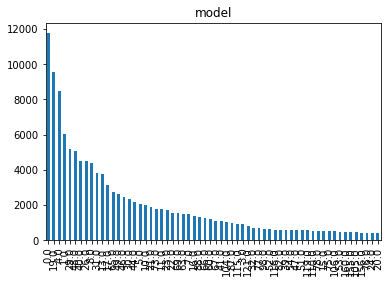

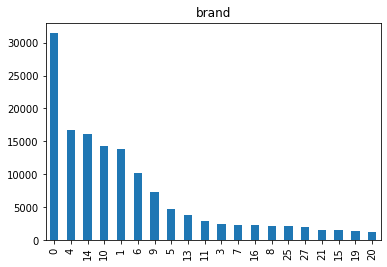

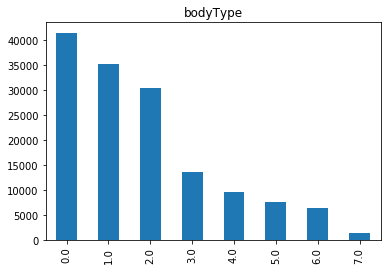

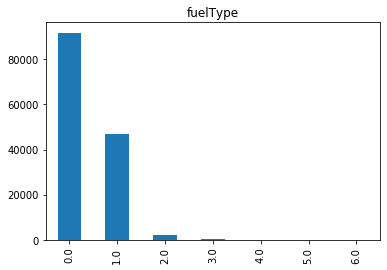

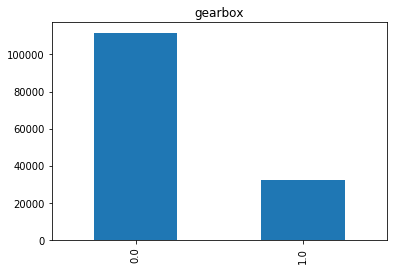

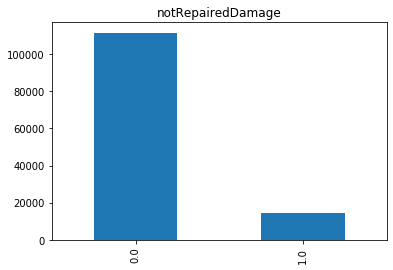

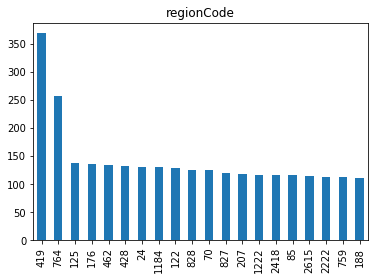

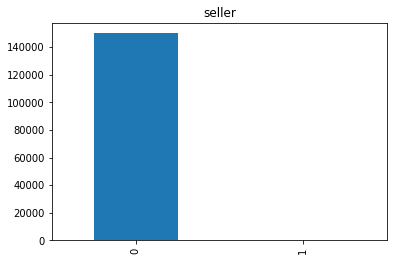

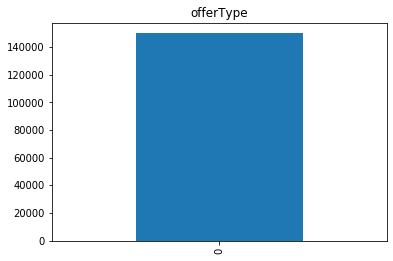

In [3]:
plt.figure()
data['model'].value_counts()[0:20].plot.bar(title='model')

plt.figure()
data['brand'].value_counts()[0:20].plot.bar(title='brand')

plt.figure()
data['bodyType'].value_counts().plot.bar(title='bodyType')

plt.figure()
data['fuelType'].value_counts().plot.bar(title='fuelType')

plt.figure()
data['gearbox'].value_counts().plot.bar(title='gearbox')

plt.figure()
data['notRepairedDamage'].value_counts().plot.bar(title='notRepairedDamage')

plt.figure()
data['regionCode'].value_counts()[0:20].plot.bar(title='regionCode')

plt.figure()
data['seller'].value_counts().plot.bar(title='seller')

plt.figure()
data['offerType'].value_counts().plot.bar(title='offerType')

## 数值属性

通过绘制盒图、散点图和直方图来可视化数据

In [11]:
# 删除异常点
def outliers_delete(data, col_name, scale=3):
    data_n = data.copy()
    data_series = data_n[col_name]
    low_range = data_series.quantile(0.25) - (data_series.quantile(0.75) - data_series.quantile(0.25)) * scale
    high_range =  data_series.quantile(0.75) + (data_series.quantile(0.75) - data_series.quantile(0.25)) * scale
    index = np.arange(data_series.shape[0])[(data_series < low_range) | (data_series > high_range)]
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    return data_n

count    1.500000e+05
mean     2.003417e+07
std      5.364988e+04
min      1.991000e+07
25%      1.999091e+07
50%      2.003091e+07
75%      2.007111e+07
max      2.015121e+07
Name: regDate, dtype: float64


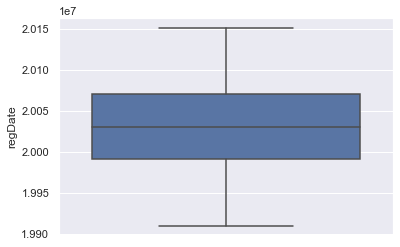

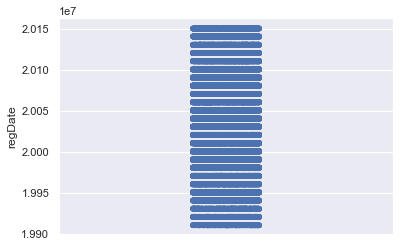

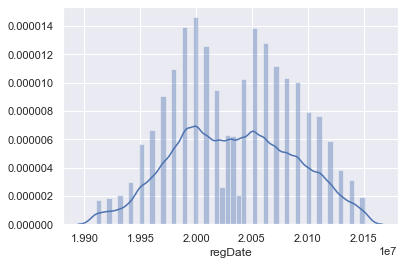

In [6]:
sns.set(style="darkgrid")
sns.boxplot(y='regDate',data=data)
print(data.regDate.describe())

plt.figure()
sns.stripplot(y='regDate',data=data)
plt.figure()
sns.distplot(data.regDate.dropna())

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       19312.000000
Name: power, dtype: float64


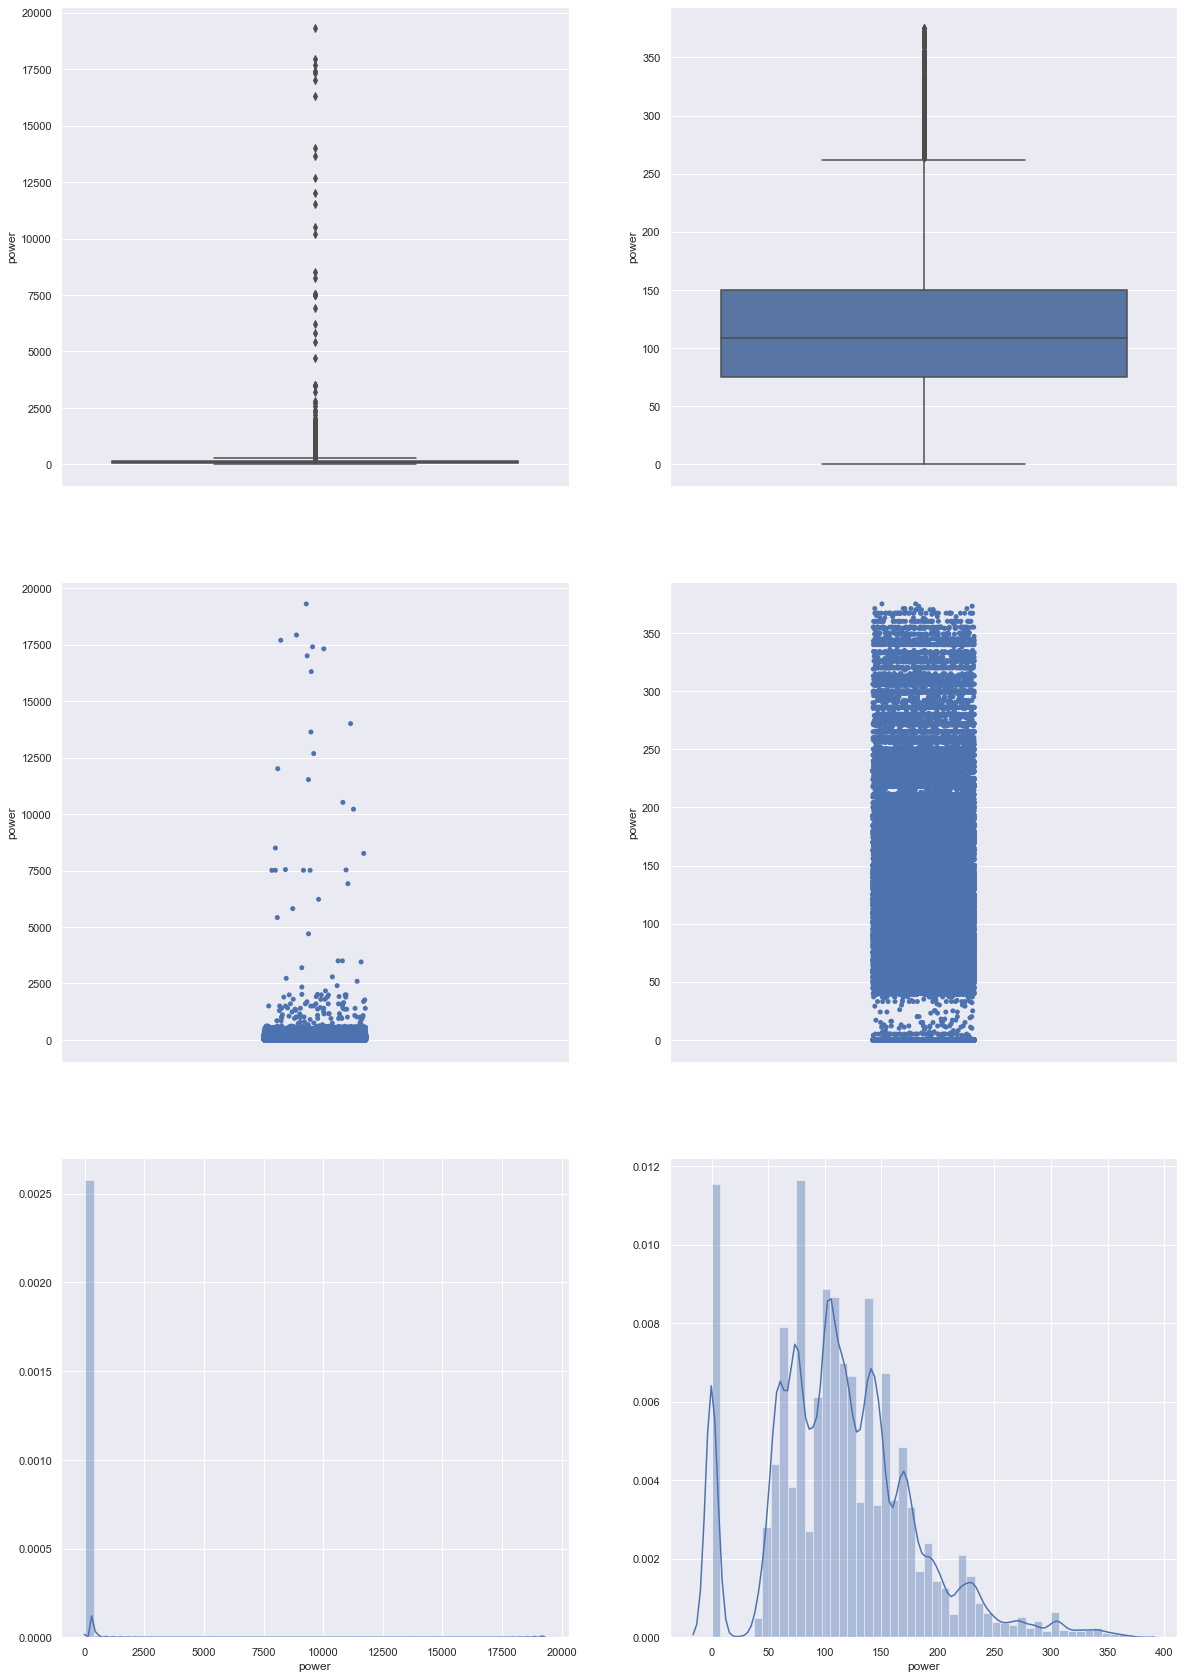

In [12]:
sns.set(style="darkgrid")
print(data.power.describe())
data_n = outliers_delete(data, 'power', scale=3)
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
sns.boxplot(y='power',data=data,ax=ax[0][0])
sns.boxplot(y='power',data=data_n,ax=ax[0][1])
sns.stripplot(y='power',data=data,ax=ax[1][0])
sns.stripplot(y='power',data=data_n,ax=ax[1][1])
sns.distplot(data.power.dropna(),ax=ax[2][0])
sns.distplot(data_n.power.dropna(),ax=ax[2][1])

count    150000.000000
mean         12.597160
std           3.919576
min           0.500000
25%          12.500000
50%          15.000000
75%          15.000000
max          15.000000
Name: kilometer, dtype: float64


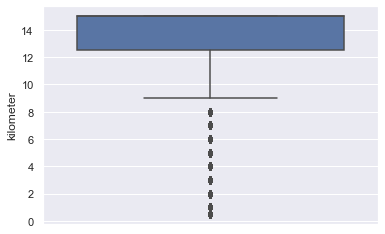

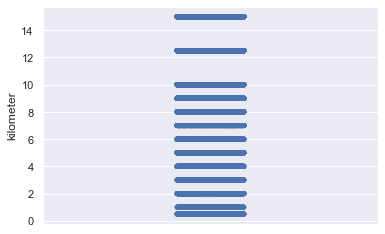

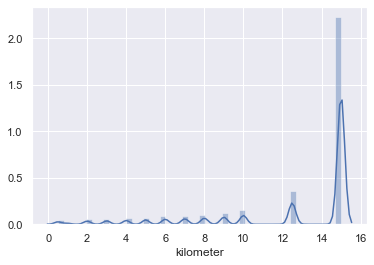

In [13]:
sns.set(style="darkgrid")
sns.boxplot(y='kilometer',data=data)
print(data.kilometer.describe())

plt.figure()
sns.stripplot(y='kilometer',data=data)
plt.figure()
sns.distplot(data.kilometer.dropna())

count    1.500000e+05
mean     2.016033e+07
std      1.067328e+02
min      2.015062e+07
25%      2.016031e+07
50%      2.016032e+07
75%      2.016033e+07
max      2.016041e+07
Name: creatDate, dtype: float64


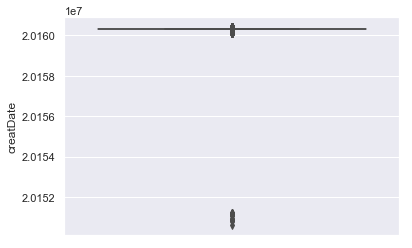

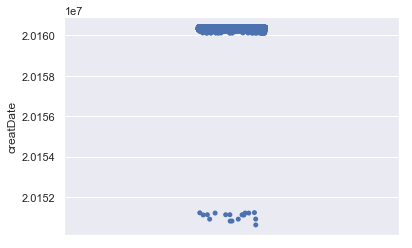

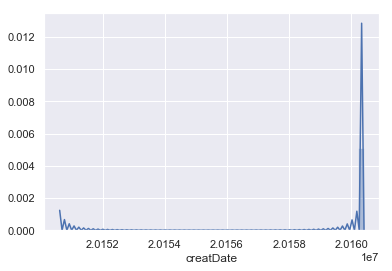

In [64]:
sns.set(style="darkgrid")
sns.boxplot(y='creatDate',data=data)
print(data.creatDate.describe())

plt.figure()
sns.stripplot(y='creatDate',data=data)
plt.figure()
sns.distplot(data.creatDate.dropna())

count    150000.000000
mean       5923.327333
std        7501.998477
min          11.000000
25%        1300.000000
50%        3250.000000
75%        7700.000000
max       99999.000000
Name: price, dtype: float64


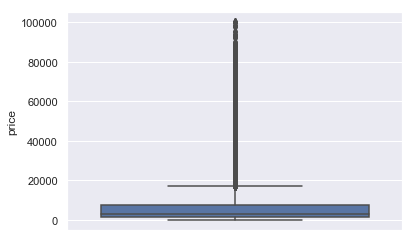

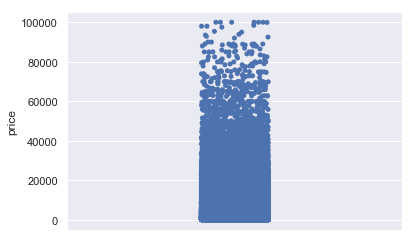

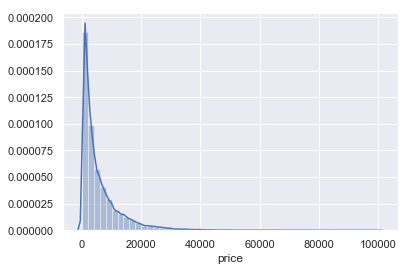

In [65]:
sns.set(style="darkgrid")
sns.boxplot(y='price',data=data)
print(data.price.describe())

plt.figure()
sns.stripplot(y='price',data=data)
plt.figure()
sns.distplot(data.price.dropna())

count    150000.000000
mean         44.406268
std           2.457548
min          30.451976
25%          43.135799
50%          44.610266
75%          46.004721
max          52.304178
Name: v_0, dtype: float64


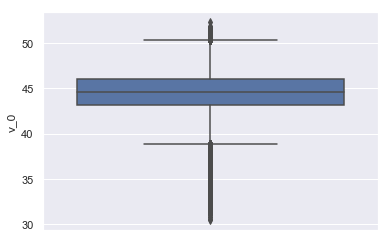

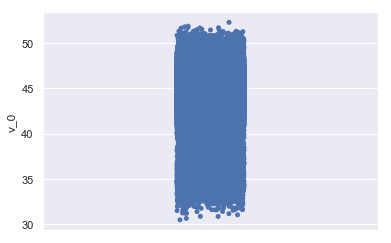

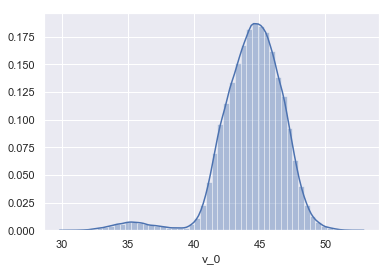

In [66]:
sns.set(style="darkgrid")
sns.boxplot(y='v_0',data=data)
print(data.v_0.describe())

plt.figure()
sns.stripplot(y='v_0',data=data)
plt.figure()
sns.distplot(data.v_0.dropna())

count    150000.000000
mean         -0.044809
std           3.641893
min          -4.295589
25%          -3.192349
50%          -3.052671
75%           4.000670
max           7.320308
Name: v_1, dtype: float64


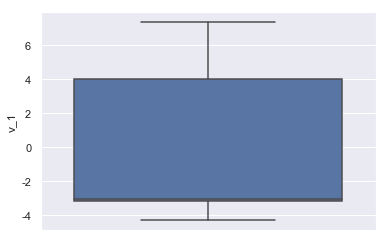

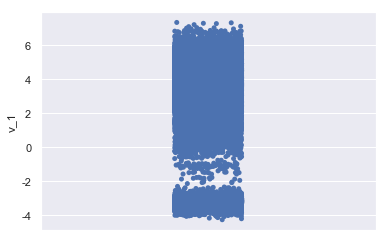

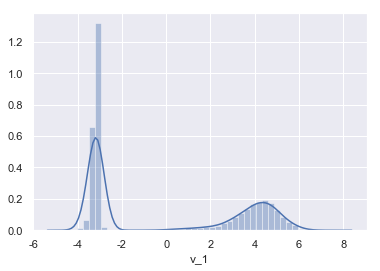

In [67]:
sns.set(style="darkgrid")
sns.boxplot(y='v_1',data=data)
print(data.v_1.describe())

plt.figure()
sns.stripplot(y='v_1',data=data)
plt.figure()
sns.distplot(data.v_1.dropna())

count    150000.000000
mean          0.080765
std           2.929618
min          -4.470671
25%          -0.970671
50%          -0.382947
75%           0.241335
max          19.035496
Name: v_2, dtype: float64


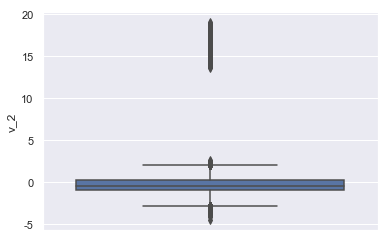

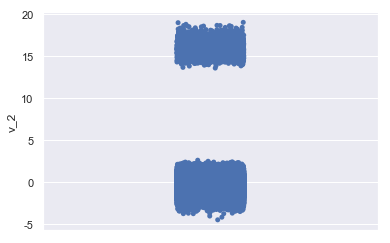

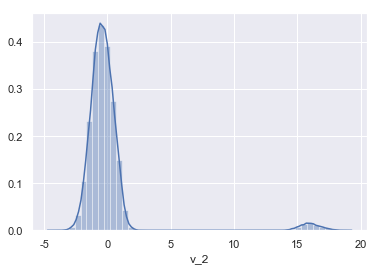

In [68]:
sns.set(style="darkgrid")
sns.boxplot(y='v_2',data=data)
print(data.v_2.describe())

plt.figure()
sns.stripplot(y='v_2',data=data)
plt.figure()
sns.distplot(data.v_2.dropna())

count    150000.000000
mean          0.078833
std           2.026514
min          -7.275037
25%          -1.462580
50%           0.099722
75%           1.565838
max           9.854702
Name: v_3, dtype: float64


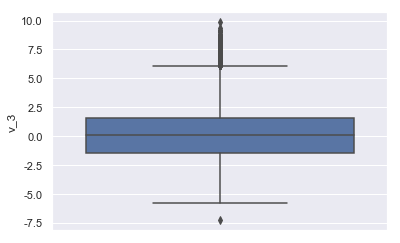

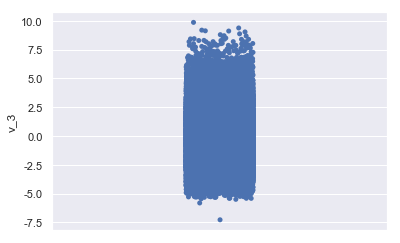

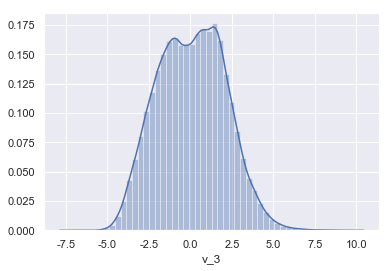

In [69]:
sns.set(style="darkgrid")
sns.boxplot(y='v_3',data=data)
print(data.v_3.describe())

plt.figure()
sns.stripplot(y='v_3',data=data)
plt.figure()
sns.distplot(data.v_3.dropna())

count    150000.000000
mean          0.017875
std           1.193661
min          -4.364565
25%          -0.921191
50%          -0.075910
75%           0.868758
max           6.829352
Name: v_4, dtype: float64


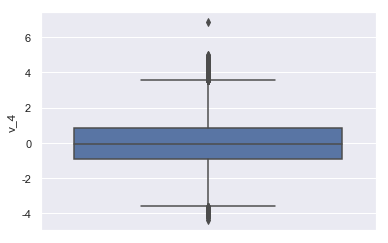

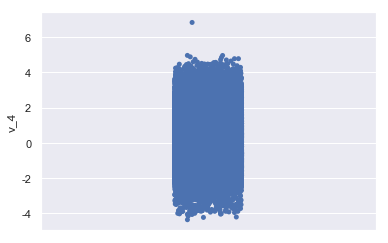

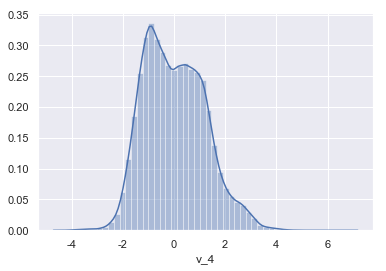

In [70]:
sns.set(style="darkgrid")
sns.boxplot(y='v_4',data=data)
print(data.v_4.describe())

plt.figure()
sns.stripplot(y='v_4',data=data)
plt.figure()
sns.distplot(data.v_4.dropna())

## 对于缺失值的处理，利用属性的相关关系来填补
这里利用拉格朗日插值的方法——最邻近插值法；

In [71]:
tmpdata=data.copy(deep=True)
for i in tmpdata.columns:
    tmpdata[i]=tmpdata[i].interpolate(method='nearest')
tmpdata=tmpdata.dropna()

print(tmpdata.isnull().sum())
tmpdata.info()

# 保存文件
tmpdata.to_csv("well_processed.csv")


Unnamed: 0.1         0
SaleID               0
name                 0
regDate              0
model                0
brand                0
bodyType             0
fuelType             0
gearbox              0
power                0
kilometer            0
notRepairedDamage    0
regionCode           0
seller               0
offerType            0
creatDate            0
price                0
v_0                  0
v_1                  0
v_2                  0
v_3                  0
v_4                  0
v_5                  0
v_6                  0
v_7                  0
v_8                  0
v_9                  0
v_10                 0
v_11                 0
v_12                 0
v_13                 0
v_14                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 32 columns):
Unnamed: 0.1         150000 non-null int64
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate    

前后可视化结果对比

由于具有缺失值的只有属性：bodyType、fuelType、gearbox 和notRepairedDamage，因此只对比这几个属性；

before
count    145494.000000
mean          1.792369
std           1.760640
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           7.000000
Name: bodyType, dtype: float64

after
count    150000.000000
mean          1.791493
std           1.760303
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           7.000000
Name: bodyType, dtype: float64


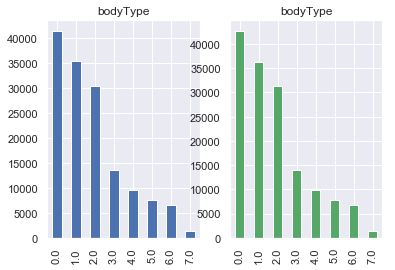

In [72]:
plt.figure()
plt.subplot(121)
data['bodyType'].value_counts().plot.bar(title='bodyType')
plt.subplot(122)
tmpdata['bodyType'].value_counts().plot.bar(title='bodyType',color='g')

print('before')
print(data.bodyType.describe())

print('\nafter')
print(tmpdata.bodyType.describe())


before
count    141320.000000
mean          0.375842
std           0.548677
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: fuelType, dtype: float64

after
count    150000.000000
mean          0.375767
std           0.548581
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: fuelType, dtype: float64


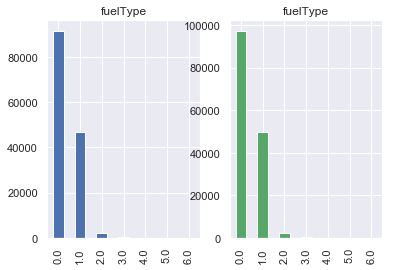

In [73]:
plt.figure()
plt.subplot(121)
data['fuelType'].value_counts().plot.bar(title='fuelType')
plt.subplot(122)
tmpdata['fuelType'].value_counts().plot.bar(title='fuelType',color='g')


print('before')
print(data.fuelType.describe())

print('\nafter')
print(tmpdata.fuelType.describe())



before
count    144019.000000
mean          0.224943
std           0.417546
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: gearbox, dtype: float64

after
count    150000.000000
mean          0.225213
std           0.417724
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: gearbox, dtype: float64


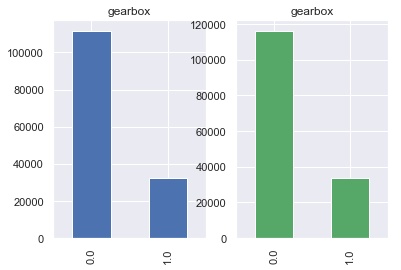

In [74]:
plt.figure()
plt.subplot(121)
data['gearbox'].value_counts().plot.bar(title='gearbox')
plt.subplot(122)
tmpdata['gearbox'].value_counts().plot.bar(title='gearbox',color='g')


print('before')
print(data.gearbox.describe())

print('\nafter')
print(tmpdata.gearbox.describe())



before
count    125676.000000
mean          0.113904
std           0.317696
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: notRepairedDamage, dtype: float64

after
count    150000.000000
mean          0.114247
std           0.318112
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: notRepairedDamage, dtype: float64


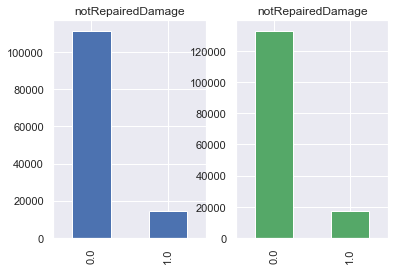

In [75]:
plt.figure()
plt.subplot(121)
data['notRepairedDamage'].value_counts().plot.bar(title='notRepairedDamage')
plt.subplot(122)
tmpdata['notRepairedDamage'].value_counts().plot.bar(title='notRepairedDamage',color='g')

print('before')
print(data.notRepairedDamage.describe())

print('\nafter')
print(tmpdata.notRepairedDamage.describe())



## 利用Apriori算法，计算频繁项，以此筛选用来预测的属性

In [76]:
import itertools
# 保存处理后的数据集的dict, 保存标称属性和数值属性离散化后的值
data_content = dict()
filename = './well_processed.csv'
header = True


header:  ['', 'Unnamed: 0.1', 'SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
150000


In [77]:

''' 找出频繁模式，利用Apriori算法'''
# 定义Apriori类


### 当最小置信度为0.1时的各个频繁项

In [79]:
a = Apriori(min_sup=0.1, dataDic=data_content)
L1, L1_item = a.find_frequent_1_itemsets()
result, L2_item = a.run()
L2 = []


print("[*] 所有的频繁项集：")
for r in result:
    print(r)

print()
len_L1 = len(L1)
print("[*] 频繁%d项集L%d：" % (1, 1))
print(len_L1)
for item in L1_item.keys():
    print(item, ':', L1_item[item])

print()
len_L2 = len(L2_item)
print(len_L2)
print("[*] 频繁%d项集L%d：" % (2, 2))
for item in L2_item.keys():
    L2.append(item)
    print(item, ':', L2_item[item])

[*] 所有的频繁项集：
['bodyType_1.0']
['fuelType_0.0']
['gearbox_0.0']
['kilometer_ 12.5']
['notRepairedDamage_0.0']
['bodyType_2.0']
['kilometer_ 15.0']
['bodyType_0.0']
['gearbox_1.0']
['fuelType_1.0']
['brand_4']
['brand_14']
['notRepairedDamage_1.0']
['brand_0']
['bodyType_1.0', 'fuelType_0.0']
['bodyType_1.0', 'gearbox_0.0']
['bodyType_1.0', 'notRepairedDamage_0.0']
['fuelType_0.0', 'gearbox_0.0']
['fuelType_0.0', 'notRepairedDamage_0.0']
['gearbox_0.0', 'notRepairedDamage_0.0']
['fuelType_0.0', 'kilometer_ 15.0']
['gearbox_0.0', 'kilometer_ 15.0']
['bodyType_2.0', 'gearbox_0.0']
['bodyType_2.0', 'notRepairedDamage_0.0']
['bodyType_2.0', 'kilometer_ 15.0']
['kilometer_ 15.0', 'notRepairedDamage_0.0']
['fuelType_0.0', 'gearbox_1.0']
['bodyType_0.0', 'fuelType_0.0']
['bodyType_0.0', 'notRepairedDamage_0.0']
['bodyType_0.0', 'kilometer_ 15.0']
['gearbox_1.0', 'notRepairedDamage_0.0']
['gearbox_1.0', 'kilometer_ 15.0']
['bodyType_0.0', 'gearbox_0.0']
['fuelType_1.0', 'gearbox_0.0']
['fuelType

### 当最小置信度为0.2时的各个频繁项

In [80]:
a = Apriori(min_sup=0.2, dataDic=data_content)
L1, L1_item = a.find_frequent_1_itemsets()
result, L2_item = a.run()
L2 = []


print("[*] 所有的频繁项集：")
for r in result:
    print(r)

print()
len_L1 = len(L1)
print("[*] 频繁%d项集L%d：" % (1, 1))
print(len_L1)
for item in L1_item.keys():
    print(item, ':', L1_item[item])

print()
len_L2 = len(L2_item)
print(len_L2)
print("[*] 频繁%d项集L%d：" % (2, 2))
for item in L2_item.keys():
    L2.append(item)
    print(item, ':', L2_item[item])

[*] 所有的频繁项集：
['bodyType_1.0']
['fuelType_0.0']
['gearbox_0.0']
['notRepairedDamage_0.0']
['bodyType_2.0']
['kilometer_ 15.0']
['bodyType_0.0']
['gearbox_1.0']
['fuelType_1.0']
['brand_0']
['bodyType_1.0', 'fuelType_0.0']
['bodyType_1.0', 'gearbox_0.0']
['bodyType_1.0', 'notRepairedDamage_0.0']
['fuelType_0.0', 'gearbox_0.0']
['fuelType_0.0', 'notRepairedDamage_0.0']
['gearbox_0.0', 'notRepairedDamage_0.0']
['fuelType_0.0', 'kilometer_ 15.0']
['gearbox_0.0', 'kilometer_ 15.0']
['kilometer_ 15.0', 'notRepairedDamage_0.0']
['bodyType_0.0', 'notRepairedDamage_0.0']
['gearbox_1.0', 'notRepairedDamage_0.0']
['bodyType_0.0', 'gearbox_0.0']
['fuelType_1.0', 'gearbox_0.0']
['fuelType_1.0', 'notRepairedDamage_0.0']
['fuelType_1.0', 'kilometer_ 15.0']
['fuelType_0.0', 'gearbox_0.0', 'notRepairedDamage_0.0']
['fuelType_0.0', 'gearbox_0.0', 'kilometer_ 15.0']
['fuelType_0.0', 'kilometer_ 15.0', 'notRepairedDamage_0.0']
['gearbox_0.0', 'kilometer_ 15.0', 'notRepairedDamage_0.0']
['fuelType_1.0', 'ge

### 当最小置信度为0.05时的各个频繁项

In [81]:
a = Apriori(min_sup=0.05, dataDic=data_content)
L1, L1_item = a.find_frequent_1_itemsets()
result, L2_item = a.run()
L2 = []


print("[*] 所有的频繁项集：")
for r in result:
    print(r)

print()
len_L1 = len(L1)
print("[*] 频繁%d项集L%d：" % (1, 1))
print(len_L1)
for item in L1_item.keys():
    print(item, ':', L1_item[item])

print()
len_L2 = len(L2_item)
print(len_L2)
print("[*] 频繁%d项集L%d：" % (2, 2))
for item in L2_item.keys():
    L2.append(item)
    print(item, ':', L2_item[item])

[*] 所有的频繁项集：
['brand_6']
['bodyType_1.0']
['fuelType_0.0']
['gearbox_0.0']
['kilometer_ 12.5']
['notRepairedDamage_0.0']
['brand_1']
['bodyType_2.0']
['power_0']
['kilometer_ 15.0']
['brand_10']
['bodyType_0.0']
['gearbox_1.0']
['fuelType_1.0']
['brand_4']
['brand_14']
['model_19.0']
['bodyType_5.0']
['bodyType_3.0']
['power_75']
['notRepairedDamage_1.0']
['brand_0']
['model_0.0']
['model_4.0']
['bodyType_4.0']
['brand_6', 'gearbox_0.0']
['brand_6', 'notRepairedDamage_0.0']
['bodyType_1.0', 'fuelType_0.0']
['bodyType_1.0', 'gearbox_0.0']
['bodyType_1.0', 'notRepairedDamage_0.0']
['fuelType_0.0', 'gearbox_0.0']
['fuelType_0.0', 'kilometer_ 12.5']
['fuelType_0.0', 'notRepairedDamage_0.0']
['gearbox_0.0', 'kilometer_ 12.5']
['gearbox_0.0', 'notRepairedDamage_0.0']
['kilometer_ 12.5', 'notRepairedDamage_0.0']
['fuelType_0.0', 'power_0']
['fuelType_0.0', 'kilometer_ 15.0']
['gearbox_0.0', 'power_0']
['gearbox_0.0', 'kilometer_ 15.0']
['notRepairedDamage_0.0', 'power_0']
['brand_1', 'gearbox

### 对表格中的特征进行特征选择

In [14]:
# 汽车的使用时间
data['usedTime'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [15]:
data['usedTime'].isnull().sum()
print(data.usedTime.describe())

count    138653.000000
mean       4432.082407
std        1953.201975
min          88.000000
25%        2941.000000
50%        4418.000000
75%        5927.000000
max        9222.000000
Name: usedTime, dtype: float64


In [16]:
data.head()

,Unnamed: 0.1,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,usedTime
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4385.0
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4757.0
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4382.0
3,3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,7125.0
4,4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1531.0


In [17]:
# 计算最高频率的值
most_frequent_value = data['usedTime'].value_counts().idxmax()
# 替换缺失值
data['usedTime'].fillna(value = most_frequent_value, inplace = True)

In [18]:
# 分别计算每种类型车的平均价格，最高价格，最低价格，平均价格以及总数量
Train_gb = data.groupby("bodyType")
all_info = {}
for kind, kind_data in Train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['bodyTypeAmount'] = len(kind_data)
    info['bodyTypePriceMax'] = kind_data.price.max()
    info['bodyTypePriceMedian'] = kind_data.price.median()
    info['bodyTypePriceMin'] = kind_data.price.min()
    info['bodyTypePriceAverage'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "bodyType"})
data = data.merge(brand_fe, how='left', on='bodyType')

In [19]:
data.head()

,Unnamed: 0.1,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_11,v_12,v_13,v_14,usedTime,bodyTypeAmount,bodyTypePriceMax,bodyTypePriceMedian,bodyTypePriceMin,bodyTypePriceAverage
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,...,2.804097,-2.420821,0.795292,0.914762,4385.0,35272.0,99999.0,1600.0,12.0,2789.36
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,...,2.096338,-1.030483,-1.722674,0.245522,4757.0,30324.0,69900.0,3500.0,15.0,5820.47
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,...,1.803559,1.565330,-0.832687,-0.229963,4382.0,35272.0,99999.0,1600.0,12.0,2789.36
3,3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,...,1.285940,-0.501868,-2.438353,-0.478699,7125.0,41420.0,98000.0,3480.0,13.0,6022.92
4,4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,...,0.910783,0.931110,2.834518,1.923482,1531.0,35272.0,99999.0,1600.0,12.0,2789.36


In [20]:
# 打印各个数值属性与价格之间的相关性
print('usedTime',data['usedTime'].corr(data['price'], method='spearman'))
print('power',data['power'].corr(data['price'], method='spearman'))
print('kilometer',data['kilometer'].corr(data['price'], method='spearman'))
print('bodyTypeAmount',data['bodyTypeAmount'].corr(data['price'], method='spearman'))
print('bodyTypePriceMax',data['bodyTypePriceMax'].corr(data['price'], method='spearman'))
print('bodyTypePriceMin',data['bodyTypePriceMin'].corr(data['price'], method='spearman'))
print('bodyTypePriceAverage',data['bodyTypePriceAverage'].corr(data['price'], method='spearman'))

usedTime -0.7536022453192838
power 0.5773425426332196
kilometer -0.4097783640876424
bodyTypeAmount -0.1977078836415173
bodyTypePriceMax -0.1095324062658541
bodyTypePriceMin 0.34554823124408146
bodyTypePriceAverage 0.3524069606523509


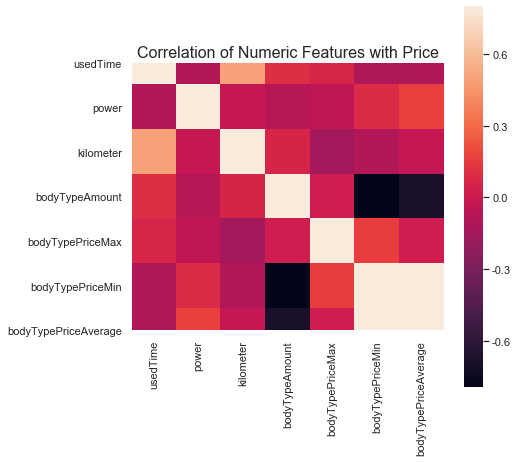

In [21]:
# 打印属性之间的相关性图
data_numeric = data[['usedTime','power', 'kilometer', 'bodyTypeAmount', 'bodyTypePriceMax', 
                     'bodyTypePriceMin', 'bodyTypePriceAverage']]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [22]:
# 对特征进行归一化
seletedCol = ['usedTime','power', 'kilometer', 'bodyTypePriceMin', 'bodyTypePriceAverage']
for col in seletedCol:
    data[col] = ((data[col] - np.min(data[col])) /(np.max(data[col]) - np.min(data[col])))

In [23]:
data.head()

,Unnamed: 0.1,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_11,v_12,v_13,v_14,usedTime,bodyTypeAmount,bodyTypePriceMax,bodyTypePriceMedian,bodyTypePriceMin,bodyTypePriceAverage
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,0.003107,...,2.804097,-2.420821,0.795292,0.914762,0.470440,35272.0,99999.0,1600.0,0.000000,0.000000
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0.000000,...,2.096338,-1.030483,-1.722674,0.245522,0.511167,30324.0,69900.0,3500.0,0.078947,0.287876
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,0.008440,...,1.803559,1.565330,-0.832687,-0.229963,0.470112,35272.0,99999.0,1600.0,0.000000,0.000000
3,3,3,71865,19960908,109.0,10,0.0,0.0,1.0,0.009994,...,1.285940,-0.501868,-2.438353,-0.478699,0.770418,41420.0,98000.0,3480.0,0.026316,0.307104
4,4,4,111080,20120103,110.0,5,1.0,0.0,0.0,0.003521,...,0.910783,0.931110,2.834518,1.923482,0.157981,35272.0,99999.0,1600.0,0.000000,0.000000
